# Modellering av pandemier
**Hvis du ikke er interessert i teorien bak SIR-modeller, kan du hoppe direkte til oppgave 1.**

Vi har sikkert alle hørt om simuleringsmodeller av pandemier. Disse modellene brukes for å informere politikerene om hva som er lurt å gjøre og hvordan vi bør oppføre oss, men hvordan fungerer egentlig disse modellene?

I denne notebooken skal vi se litt på en av de enkleste modellene for sykdomsmodellering: den såkalte SIR modellen. SIR står for Susceptible, infected og removed, eller smittbar, smittet og fjernet på norsk og representerer de tre forskjellige gruppene et menneske kan tilhøre i en slik modell.

La oss nå se nærmere på de tre kategoriene i SIR modellen
 * Smittbar (Susceptible): De som kan bli smittet
 * Smittede (Infected): De som kan smitte andre
 * Fjernet (Removed): De som har blitt immune eller dødd

I pandemimodellene som lages av eksperter er det så klart flere kategorier enn dette, men de tar nesten alltid utgangspunkt i en SIR modell og legger til flere grupperinger. Hvis vi forstår SIR modellen så har vi godt grunnlag til å forstå modellene som det snakkes om i avisene!

## Matematisk modellering av SIR dynamikk
For å danne en matematisk SIR modell må vi først beskrive hvordan de forskjellige gruppene oppfører seg påvirker hverandre.

**Smittbare personer:** En person kan bli smittet, men sannsynligheten for å bli smittet er avhengig av hvor mange som er smittet for øyeblikket. Vi kan skrive det slik

$$ S_{t+1} = S_t - i S_t, $$

hvor $S_t$ er antall smittbare ved dag nr. $t$, $i$ er smitteraten (infection rate). Men hva er egentlig denne smitteraten? Vel vi vet at den må være avhengig av antall smittede for hvis ingen er smittede, er smitteraten lik 0. Tilsvarende, hvis vi går fra 10 til 20 smittede, kan vi se for oss at smitteraten dobles. Det gir derfor mening å ha en proposjonalitetsrelasjon mellom smitteraten og antall smittede. Hvis vi har det, så får vi denne likningen istedenfor

$$ S_{t+1} = S_t - i I_t S_t, $$

hvor $S_t$ og $I_t$ er antall smittbare og smittede ved dag nr. $t$ og $i$ er smitteraten.

**Antall smittede:** Vi vet at antall som blir smittet er likt med antall friske som blir smittede. Hvis vi skriver det matematisk får vi

$$ I_{t+1} = I_t + i I_t S_t, $$

hvor $S_t$ og $I_t$ er antall smittbare og smittede ved dag nr. $t$ og $i$ er smitteraten. Hvis vi kun har den relasjonen så vil jo ingen bli immune eller dø. Vi må altså ha med en sammenheng for det og. Hver dag er det en fast sannsynlighet for at en smittet person enten blir frisk eller dør, som betyr at antall smittede synker proposjonalt med antallet som er smittet. Hvis vi skriver det matematisk får vi denne sammenhengen for antall smittede:

$$ I_{t+1} = I_t + i I_t S_t - d I_t, $$

hvor $S_t$ og $I_t$ er antall smittbare og smittede ved dag nr. $t$, $i$ er smitteraten og $d$ er sannsynligheten for å gå fra å være syk til å enten bli frisk og immun eller dø.

**Antall fjernede:** Antallet som er fjernet fra simuleringen, altså de som er immune eller døde, har vi jo allerede funnet ut at er proposjonalt med antall syke. Hvis vi skriver det, så får vi denne sammenhengen.

$$ R_{t+1} = R_t + d I_t, $$

hvor $R_t$ og $I_t$ er antall fjernede og smittede ved dag nr. $t$ og $d_t$ er sannsynligheten for at en syk person enten bli frisk eller dør i løpet av et tidssteg.

**Kombinere alle likningene:** Hvis vi kombinerer alle likningene våre får vi dette uttrykket:

$$ \Large{S_{t+1} = S_t - i S_t I_t}, $$
$$ \Large{I_{t+1} = I_t + i S_t I_t - d I_t}, $$
$$ \Large{R_{t+1} = R_t + d I_t}, $$

som vi kan programmere likt slikt vi programmerte rovdyr-byttedyr modellen.

## Oppgaver

In [41]:
from pylab import arange, zeros, plot, xlabel, ylabel, title, legend, show

### Oppgave 1: Enkel implementasjon av SIR-modellen

Vi starter med å implementere SIR-modellen, uten å fokusere på å ha fornuftige størrelser. I Oppgave 2 skal vi simulere en pandemi i Oslo.

#### Repetisjon:
Husk at SIR-modellen er gitt ved den rekursive sammenhengen:
$$ \large{S_{t+1} = S_t - i S_t I_t}, $$
$$ \large{I_{t+1} = I_t + i S_t I_t - d I_t}, $$
$$ \large{R_{t+1} = R_t + d I_t}, $$
hvor $S_t$ er antall friske mennesker ved tid $t$, $I_t$ er antall smittede mennesker ved tid $t$ og $R_t$ er antall immune og døde mennesker ved tid $t$. $i$ representerer *infeksjonsraten* og $d$ representerer raten syke mennesker fjernes fra simuleringen (altså raten syke individ blir immune eller død med).

#### Oppgave 1a)
Opprett en variabel `fjerne_rate` som representerer $d$ og `infeksjonsrate` som representere $i$. Sett $d = 0.03$ og $i = 0.0000005$

In [42]:
fjerne_rate = 0.03
infeksjonsrate = 0.0000005

#### Oppgave 1b)
Fyll inn den manglende koden slik at vi starter med $S_0 = 499 970$, $I_0 = 30$ og $R_0 = 0$.

In [43]:
antall_simuleringsdager = 365
smittbar = zeros(antall_simuleringsdager)
smittet = zeros(antall_simuleringsdager)
fjernet = zeros(antall_simuleringsdager)


smittbar[0] = 499970
smittet[0] = 30
fjernet[0] = 0

#### Oppgave 1c)
Fyll inn den manglende koden i simuleringsløkka under slik at vi simulerer en pandemi med SIR-modellen. (**Hint:** Se på den rekursive sammenhengen for SIR-modellen over)

In [51]:
for t in range(antall_simuleringsdager - 1):
    smittbar[t+1] = smittbar[t] - infeksjonsrate*smittbar[t]*smittet[t]
    smittet[t+1] = smittet[t] + infeksjonsrate*smittbar[t]*smittet[t] - fjerne_rate*smittet[t]
    fjernet[t+1] = fjernet[t] + fjerne_rate*smittet[t]

#### Oppgave 1d)
**Refleksjonsoppgave:** Hvorfor lar vi `t` gå fra 0 til `antall_simuleringsdager-2`? (husk `range`-funksjonen går igjennom tall fra og med og 0 til men ikke med endepunktet). Hva vil skje hvis vi lar den gå til `antall_simuleringsdager-1`?

#### Oppgave 1e)
Fyll inn den manglende koden under for å lage et plott over antall smittbare, smittede og fjernede mennesker i simuleringen som funksjon av tid.

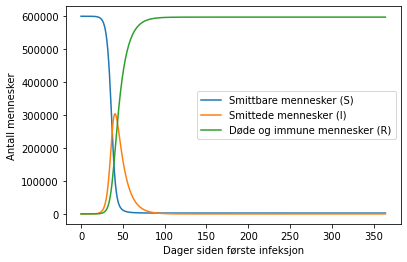

In [52]:
tid = arange(antall_simuleringsdager)

plot(tid, smittbar, label="Smittbare mennesker (S)")
plot(tid, smittet, label="Smittede mennesker (I)")
plot(tid, fjernet, label="Døde og immune mennesker (R)")
xlabel("Dager siden første infeksjon")
ylabel("Antall mennesker")
legend()
show()

# Valg av modellparametre
**Hvis du ikke er interessert i teorien bak SIR-modeller, kan du hoppe direkte til oppgave 2.**

### Valg av initialpopulasjoner
Så nå har vi en matematisk modell for å simulere antallet syke i befolkningen, men hvordan kan vi egentlig velge disse ratene?

La oss ta utgangspunkt i en by som Oslo, hvor det er ca 600 000 innbyggere. Hvis vi starter med 2 syke og 599 998 friske personer, så får vi at

$$ S_0 = 599 998, $$
$$ I_0 = 2, $$
$$ R_0 = 0. $$

### Valg av $d$:
$d$ representerer sannsynligheten for at en smittet person blir frisk eller dør i løpet av en dag. Hvis den forventede syketiden er $T$, vil $d$ være gitt ved

$$ d = \frac{1}{T}. $$

Hvis vi sier at man i snitt er syk i 10 dager, vil vi ha at

$$ d = 0.1.$$

### Valg av $i$:
$i$ er den parameteren som er mest innviklet å velge. Det er en del logikk bak det, men hvert steg er ganske rett frem.

For å velge $i$ kan vi starte med å se på likningen for antall smittbare:

$$ S_{t+1} = S_t - i S_t I_t. $$

Vi ser at hver smittede person smitter totalt $i S_t$ nye personer hver dag. Hva betyr dette? La oss ta utgangspunkt i noen eksempelscenarioer og tolke modellen for å finne en fornuftig verdi for dette.

#### Eksempelscenario: Nesten ingen har blitt syk
Hvis nesten ingen har blitt syke ennå, må nesten alle en syk person møter i løpet av en dag være smittbare. Det betyr at antallet friske som en syk person smitter er gitt ved smittesannsynligheten ganget med antall personer en syk person møter i løpet av en dag. Vi kan skrive det slik

$$ S_{t+1} = S_t - m p_{\text{smitte}} I_t, $$

hvor $m$ er hvor mange personer en gjennomsnittsperson møter i løpet av en dag og $p_{\text{smitte}}$ er sannsynligheten for å smitte en person du møter.

#### Eksempelscenario: Halve befolkningen er syk
Hvis halve befolkningen er blitt syk uten at noen smitteværnstiltak er satt inn så vil smittesannsynligheten, $p_{\text{smitte}}$, være konstant. Den eneste endringen vil altså være at antall smittbare personer en syk person møter i løpet av en dag vil være halvert. Hvis vi skriver dette matematisk får vi 
denne sammenhengen:

$$ S_{t+1} = S_t - \frac{m}{2} p_{\text{smitte}} I_t, $$

hvor $m$ nok en gang er hvor mange personer en gjennomsnittsperson møter i løpet av en dag og $p_{\text{smitte}}$ er sannsynligheten for å smitte noen om du er syk. 

#### Eksempelscenario: Hele befolkningen har vært eller er syke
Hvis hele befolkningen har vært eller er syke, så vil ingen nye personer bli smittet, altså er

$$ S_{t+1} = S_t - 0 p_{\text{smitte}} I_t. $$

#### Hva betyr disse eksempelscenarioene?
Vi ser at antall friske personer som blir smittet i løpet av en dag, $t$, er gitt ved 

$$ \text{nye syke} = p_{\text{smitte}} n_t I_t, $$

hvor $n_t$ er antall smittbare personer en gjennomsnittlig syk person møter i løpet av en dag, $p_{\text{smitte}}$ er smittesannsynligheten og $I_t$ er antallet syke personer.

Den neste parameteren vi må finne er hvor mange smittbare personer en syk person møteri løpet av en dag, $n_t$. Dette er gitt ved andelen smittbare i befolkningen 

$$ n_t = m \frac{S_t}{N}, $$

hvor $m$ er det totale antallet personer en syk person møter i løpet av en dag, $S_t$ er antall smittbare personer den gjeldende dagen og $N$ er den totale befolkningen. 

La oss nå sette sammen alt dette for å finne en logisk verdi for $i$:

$$ S_{t+1} = S_t + p_{\text{smitte}} m \frac{S_t}{N} I_t, $$

hvis vi flytter på brøken, får vi at

$$ i = \frac{m p_{\text{smitte}}}{N}, $$

hvor $m$ er det totale antallet personer en syk person møter i løpet av en dag, $p_{\text{smitte}}$ er sannsynligheten for at en syk person smitter en smittbar person han eller hun møter og $N$ er det totale befolkningstallet.

### Overslag av verdien til $i$
 * Det er en 5% sannsynlighet for å smitte noen
   * $p_{\text{smitte}} = 0.05$
 * Hver person møter i snitt 25 nye i løpet av en dag
   * $m = 25$

Hvis vi kombinerer disse antakelsene med et innbyggertall på 600000, får vi

$$ i = \frac{0.1 \times 25}{600000} $$

### Oppgave 2
Nå skal vi simulere en pandemi i Oslo. For å gjøre det må vi bruke sammenhengene vi fant over.

#### Repetisjon av teori
 * Det totale befolkningstallet er $N$
 * Antall smittbare personer ved starten av simuleringen er gitt ved $S_0 = N - I_0$
 * Antall smittede personer ved starten av simuleringen er en fri parameter definert av brukeren.
 * Vi starter med ingen fjernede personer fra simuleringen: $R_0 = 0$.
 * Fjerne-raten, $d$ er gitt ved $d = \frac{1}{T},$ hvor $T$ er den forventede syketiden.
 * Infeksjonsraten, $i$ er gitt ved $i = \frac{m p_{\text{smitte}}}{N},$ hvor $m$ er antallet personer en syk person møter i løpet av en dag, $p_{\text{smitte}}$ er sannsynligheten for at en syk person smitter en smittbar person han eller hun møter og $N$ er det totale befolkningstallet.

#### Oppgave 2 a)
Opprett variablene `befolkningstall`, `forventet_syketid`, `smittesannsynlighet`, `antall_man_møter` og `syke_ved_start` og gi de verdier fra tabellen under

|           Parameter | Verdi     |
|--------------------:|:----------|
|                 $N$ |   600 000 |
|                 $T$ |        10 |
|                 $m$ |        25 |
| $p_{\text{smitte}}$ | 0.02 (2 %)|
|               $I_0$ |         2 |

In [53]:
# Befolkningsparametre
befolkningstall = 600_000
forventet_syketid = 10
antall_man_møter = 25
smittesannsynlighet = 0.02
syke_ved_start = 2

#### Oppgave 2b)

Opprett en variabel `fjerne_rate` som representerer $d$ og `infeksjonsrate` som representere $i$. Gi variablene fornuftige verdier basert på $T$, $m$ og $p_{\text{smitte}}$. (**Hint:** Se på likningene for $d$ og $i$ over).

In [54]:
# Modellparametre
fjerne_rate = 1/forventet_syketid
infeksjonsrate = antall_man_møter*smittesannsynlighet/befolkningstall

#### Oppgave 2c)
Fyll inn den manglende koden i cella under. (**Hint:** Se på likningene for $d$ og $i$ over).

In [55]:
# Simuleringslengde
simuleringslengde = 365

# Startverdier til simuleringen
smittbar = zeros(simuleringslengde)
smittet = zeros(simuleringslengde)
fjernet = zeros(simuleringslengde)


smittbar[0] = befolkningstall - syke_ved_start
smittet[0] = syke_ved_start
fjernet[0] = 0

#### Oppgave 2d)

Fyll inn den manglende koden i simuleringsløkka under

In [56]:
for t in range(antall_simuleringsdager - 1):
    smittbar[t+1] = smittbar[t] - infeksjonsrate*smittbar[t]*smittet[t]
    smittet[t+1] = smittet[t] + infeksjonsrate*smittbar[t]*smittet[t] - fjerne_rate*smittet[t]
    fjernet[t+1] = fjernet[t] + fjerne_rate*smittet[t]

#### Oppgave 2e)

**Refleksjonsoppgave:** Under er kode som genererer et plott over smittbare, smittede og immune/døde mennesker i Oslo som funksjon av hvor lenge pandemien har pågått. Hvilke parametre kan du endre for å redusere det maksimale antallet smittede personer på en gang? Prøv å endre disse variablene og kjør simuleringen igjen.

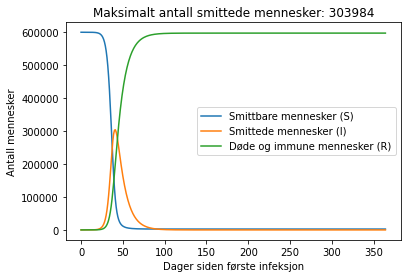

In [57]:
tid = arange(antall_simuleringsdager)

plot(tid, smittbar, label="Smittbare mennesker (S)")
plot(tid, smittet, label="Smittede mennesker (I)")
plot(tid, fjernet, label="Døde og immune mennesker (R)")
xlabel("Dager siden første infeksjon")
ylabel("Antall mennesker")
title(f"Maksimalt antall smittede mennesker: {max(smittet):.0f}")
legend()
show()

#### Oppgave 2f) (bonusoppgave)
Lag en funksjon `simuler_pandemi(befolkningstall, forventet_syketid, antall_man_møter, smittesannsynlighet, syke_ved_start)` som tar inn de fire parameterne til en pandemismulering og genererer et plott av smittbare, smitttede og fjernede mennesker som funksjon av tid.

In [58]:
def simuler_pandemi(befolkningstall, forventet_syketid, antall_man_møter, smittesannsynlighet, syke_ved_start):
    # Modellparametre
    fjerne_rate = 1/forventet_syketid
    infeksjonsrate = antall_man_møter*smittesannsynlighet/befolkningstall
    
    # Simuleringslengde
    simuleringslengde = 365

    # Startverdier til simuleringen
    smittbar = zeros(simuleringslengde)
    smittet = zeros(simuleringslengde)
    fjernet = zeros(simuleringslengde)


    smittbar[0] = befolkningstall - syke_ved_start
    smittet[0] = syke_ved_start
    fjernet[0] = 0
    
    for t in range(antall_simuleringsdager - 1):
        smittbar[t+1] = smittbar[t] - infeksjonsrate*smittbar[t]*smittet[t]
        smittet[t+1] = smittet[t] + infeksjonsrate*smittbar[t]*smittet[t] - fjerne_rate*smittet[t]
        fjernet[t+1] = fjernet[t] + fjerne_rate*smittet[t]
        
    tid = arange(antall_simuleringsdager)

    plot(tid, smittbar, label="Smittbare mennesker (S)")
    plot(tid, smittet, label="Smittede mennesker (I)")
    plot(tid, fjernet, label="Døde og immune mennesker (R)")
    xlabel("Dager siden første infeksjon")
    ylabel("Antall mennesker")
    title(f"Maksimalt antall smittede mennesker: {max(smittet):.0f}")
    legend()
    show()

#### Oppgave 2g) (bonusoppgave)
Bruk `interact`-funksjonen fra `ipywidgets`-biblioteket for å knytte `simuler_pandemi`-funksjonen til glidebrytere for å ha et interaktivt plott over en pandemisimulering

In [70]:
from ipywidgets import interact

interact(
    simuler_pandemi,
    befolkningstall=(0, 1_000_000), 
    forventet_syketid=(0, 40), 
    antall_man_møter=(0, 50), 
    smittesannsynlighet=(0.0, 0.15, 0.01), 
    syke_ved_start=(0, 20)
)

interactive(children=(IntSlider(value=500000, description='befolkningstall', max=1000000), IntSlider(value=20,…

<function __main__.simuler_pandemi(befolkningstall, forventet_syketid, antall_man_møter, smittesannsynlighet, syke_ved_start)>